In [2]:
import pandas as pd

# make a dataframe
df = pd.read_csv('sample_data/Mall_Customers.csv')

# show first 3 line
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
# change data column
df = df.rename(columns={'Gender': 'gender', 'Age':'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)':'spending_score'})

# change catogoric data to numeric data
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# print preprocessing data
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [4]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis = 1)

# membuat list berisi inertia
clusters = []
for i in range (1,11):
  km = KMeans(n_clusters = i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

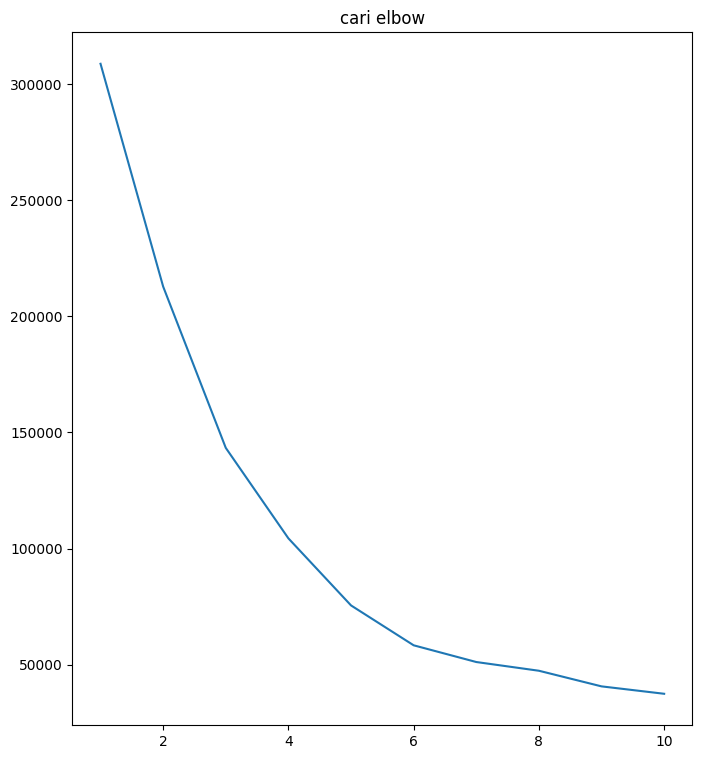

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize = (8, 9))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('cari elbow')
ax.set_label('clusters')
ax.set_label('inertia')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


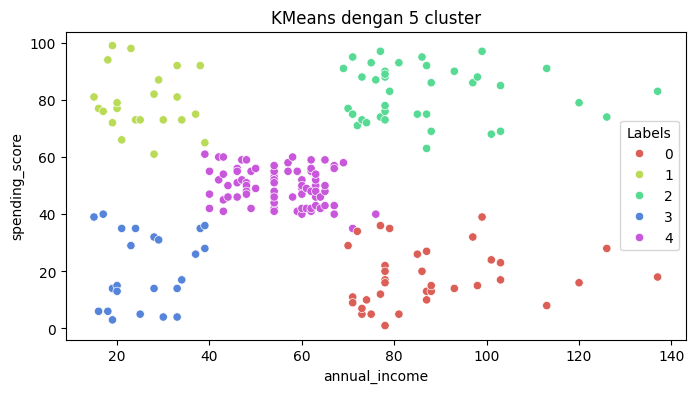

In [14]:
# create KMeans object
km5 = KMeans(n_clusters=5).fit(X)

# add label column at datasets
X['Labels'] = km5.labels_

# add lable column at dataset
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 cluster')
plt.show()